In [17]:
import numpy as np; import matplotlib.pyplot as plt; import pandas as pd; import seaborn as sns
sns.set_theme(font_scale=2)

In [23]:
validation2x2 = pd.read_csv('validation2x2.csv')
validation2x2

,energy,energy1mom,energy2mom,magnetization,magnetization1mom,magnetization2mom,heatCapacity,susceptibility,temperature,gridsize
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,2.0
1,0.0,0.000000,0.000000,2.0,1.000000,2.000000,0.000000,0.250000,1.0,2.0
2,-8.0,-2.666667,21.333333,4.0,2.000000,6.666667,3.555556,0.666667,1.0,2.0
3,-8.0,-4.000000,32.000000,4.0,2.500000,9.000000,4.000000,0.687500,1.0,2.0
4,-8.0,-4.800000,38.400000,4.0,2.800000,10.400000,3.840000,0.640000,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
1995,-8.0,-7.967936,63.743487,-4.0,3.988978,15.945892,0.063871,0.008487,1.0,2.0
1996,-8.0,-7.967952,63.743615,-4.0,3.988983,15.945919,0.063839,0.008482,1.0,2.0
1997,-8.0,-7.967968,63.743744,-4.0,3.988989,15.945946,0.063808,0.008478,1.0,2.0
1998,0.0,-7.963982,63.711856,0.0,3.986993,15.937969,0.071712,0.010463,1.0,2.0


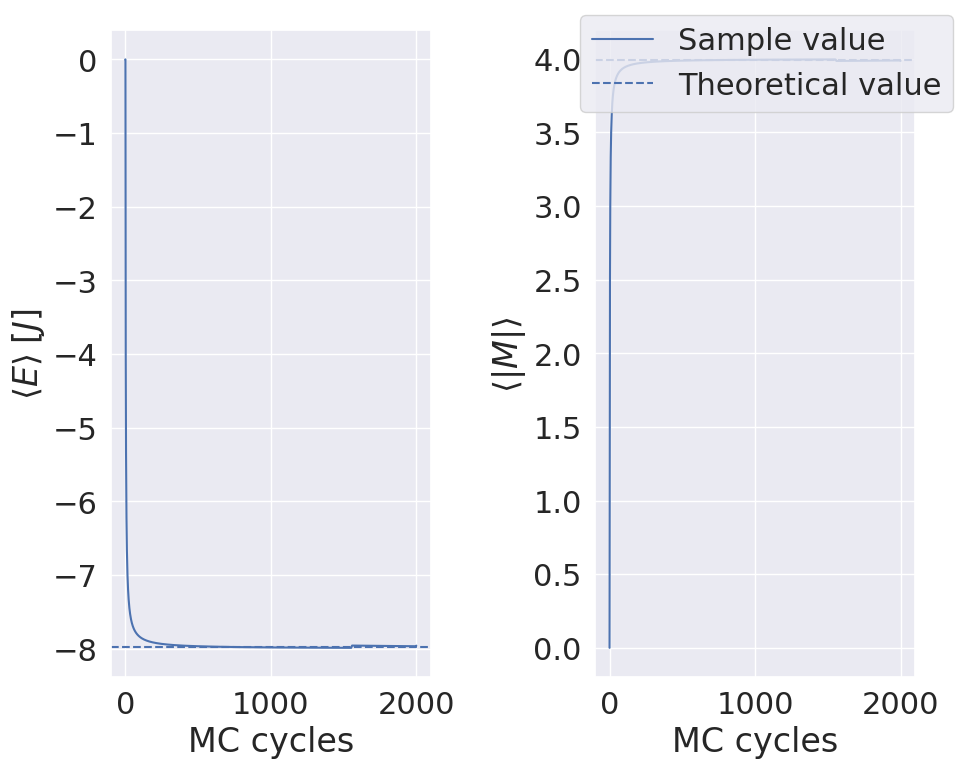

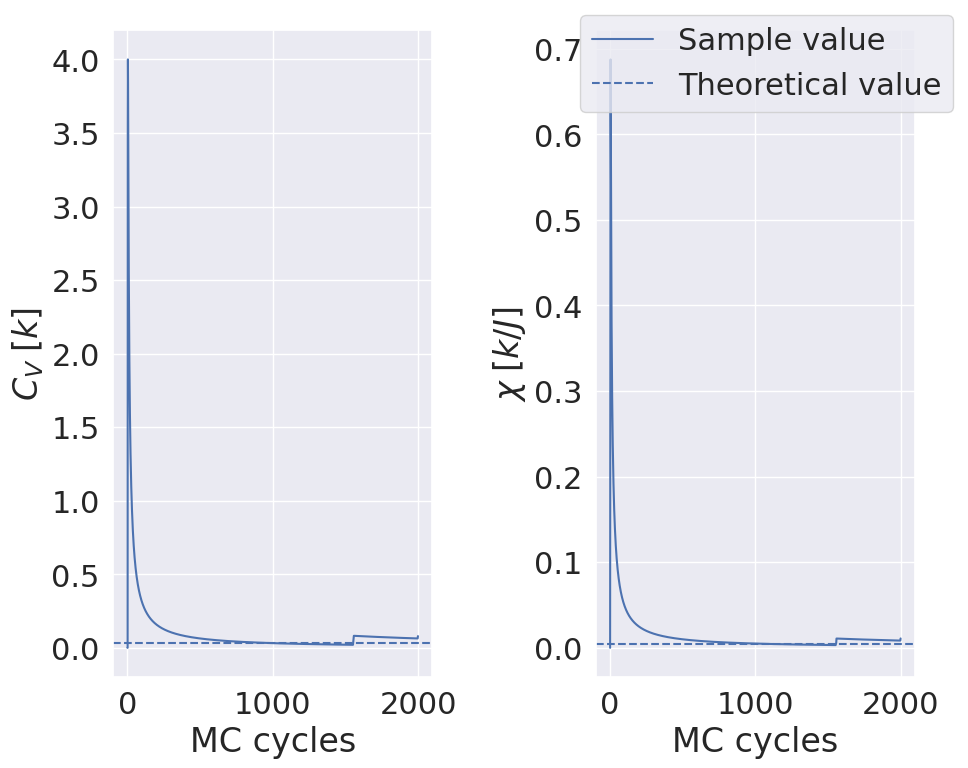

In [46]:
T = np.mean(validation2x2.temperature)
beta = 1/T
Z = 12 + + 4*np.cosh(8*beta)
avgEng = -32*np.sinh(8*beta)/Z
engMom2 = 256*np.cosh(8*beta)/Z
avgM = (16 + 8*np.exp(8*beta))/Z
mMom2 = (32 + 32*np.exp(8*beta))/Z
cV = 64/(T**2)*(1/Z*np.cosh(8*beta) - 4/Z**2*np.sinh(8*beta)**2)
chi = 8*beta*((1 + np.exp(8*beta))/Z - 2*(2 + np.exp(8*beta))**2/Z**2 )


cycles = np.arange(0, len(validation2x2))
fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].plot(cycles, validation2x2.energy1mom, label = 'Sample value')
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$\langle E \rangle\; [J]$')
axs[0].axhline(avgEng, linestyle = '--', label = 'Theoretical value')

axs[1].plot(cycles, validation2x2.magnetization1mom)
axs[1].axhline(avgM, linestyle = '--')
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\langle |M| \rangle$')
fig.tight_layout()
fig.legend()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].plot(cycles, validation2x2.heatCapacity)
axs[0].axhline(cV, linestyle = '--')
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$C_V\; [k]$')

axs[1].plot(cycles, validation2x2.susceptibility, label = 'Sample value')
axs[1].axhline(chi, linestyle = '--', label = 'Theoretical value')
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\chi\; [k/J]$')
fig.tight_layout()
fig.legend()
plt.show()




In [42]:
print(cV)

0.03208233186428622


In [43]:
print(chi)

0.004010739516227435
